# Goal - To build a machine learning model that is able to answer which customers are profitable, and decide who to approve.
How business works :
- Selected customers are given cards
- Customers make transactions depending upon their limits, credi_line
- Company earns commission on each transaction and as interest on leftover amount 
- If customer defaults, whole amount is lost 

         -Tasks performed in this file
             - Data Cleaning
             - Exploratory Data Analysis
             - Misisng values Treatment
             - Categorical Features Encoding
             - Feature Creation
         -Analyst - Rageeni Sah
         -Date - 29th Sept, 2018

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from datetime import datetime
from scipy.stats import skew

import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

## Load train and test dataset

In [2]:
def load_dataset():
    train_df = pd.read_csv('C:/Users/ragesah.ORADEV/Desktop/Puzzle/puzzle_train_dataset.csv')
    test_df = pd.read_csv('C:/Users/ragesah.ORADEV/Desktop/Puzzle/puzzle_test_dataset.csv')
    return train_df, test_df
    
train_df, test_df = load_dataset()   
print('Train Datasize: {} and Test Datasize {}'.format(train_df.shape, test_df.shape))

Train Datasize: (64592, 29) and Test Datasize (35000, 28)


## Target variable 'default' analysis

Default has 3 unique values: [False True nan]
Count True: 9510
Count False: 50456
Count NAN: 4626


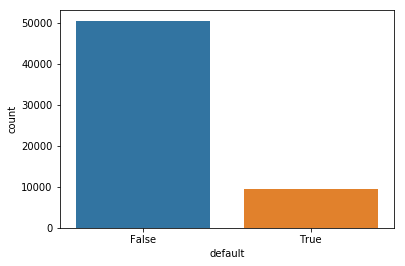

In [3]:
print('Default has {} unique values: {}'.format(len(train_df.default.unique()), train_df.default.unique()))
print('Count True:', len(train_df[train_df['default'] == True]))
print('Count False:', len(train_df[train_df['default'] == False]))
rem = train_df.shape[0] - (len(train_df[train_df['default'] == True]) + len(train_df[train_df['default'] == False]))
print('Count NAN:', rem )

sns.countplot(x = 'default', data = train_df)  # Imbalanced dataset

## Univariate Analysis

In [4]:
numerical_features = train_df.select_dtypes(include = [np.number]).columns
categorical_features = train_df.select_dtypes(include = [np.object]).columns

print(numerical_features)
print(categorical_features)

Index(['score_3', 'score_4', 'score_5', 'score_6', 'risk_rate',
       'amount_borrowed', 'borrowed_in_months', 'credit_limit', 'income',
       'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts',
       'n_issues'],
      dtype='object')
Index(['ids', 'default', 'score_1', 'score_2', 'reason', 'sign', 'gender',
       'facebook_profile', 'last_payment', 'end_last_loan', 'state', 'zip',
       'channel', 'job_name', 'real_state'],
      dtype='object')


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64592 entries, 0 to 64591
Data columns (total 29 columns):
ids                   64592 non-null object
default               59966 non-null object
score_1               63807 non-null object
score_2               63807 non-null object
score_3               63807 non-null float64
score_4               64592 non-null float64
score_5               64592 non-null float64
score_6               64592 non-null float64
risk_rate             63807 non-null float64
amount_borrowed       63807 non-null float64
borrowed_in_months    63807 non-null float64
credit_limit          44839 non-null float64
reason                63801 non-null object
income                63807 non-null float64
sign                  43825 non-null object
gender                57406 non-null object
facebook_profile      58185 non-null object
last_payment          63730 non-null object
end_last_loan         63804 non-null object
state                 63807 non-null object
zi

In [6]:
missing_values = train_df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(train_df))*100
dummy = pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing']) 
dummy[dummy['% Missing'] > 0]

,Missing values,% Missing
ok_since,38038,58.889646
sign,20767,32.151040
credit_limit,19753,30.581187
n_issues,16451,25.469098
gender,7186,11.125217
facebook_profile,6407,9.919185
job_name,4795,7.423520
default,4626,7.161878
n_bankruptcies,987,1.528053
last_payment,862,1.334531


### Trying to understand data for missing values in target 'nan'

In [7]:
missing_target = train_df[(train_df['default'] != True) & (train_df['default'] != False) ]
missing_values = missing_target.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(missing_target))*100
missing_dummy = pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing']) 
missing_dummy[missing_dummy['% Missing'] > 0]

,Missing values,% Missing
default,4626,100.000000
gender,4190,90.575011
ok_since,2949,63.748379
sign,1829,39.537397
job_name,1004,21.703415
credit_limit,974,21.054907
n_issues,871,18.828361
reason,786,16.990921
channel,785,16.969304
n_bankruptcies,785,16.969304


In [8]:
train_df = train_df[(train_df['default'] == True) | (train_df['default'] == False) ]
# target varibale binarization
train_df.default = train_df.default.map({True:1, False:0})

In [9]:
train_df.describe()

,default,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,41187.000000,5.996600e+04,24877.000000,59764.000000,59948.000000,59966.000000,44386.000000
mean,0.158590,346.435147,99.999870,0.498721,99.943175,0.294114,13411.805468,40.674649,34093.005997,7.132578e+04,35.276762,0.077706,0.004671,10.624571,11.001036
std,0.365296,109.842822,3.174459,0.288653,10.035178,0.101183,7957.402823,9.504775,36783.480509,5.169143e+04,21.630884,0.278433,0.079059,4.575357,4.569516
min,0.000000,0.000000,86.191572,0.000035,60.663039,0.000000,527.070000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,270.000000,97.856471,0.250013,93.213368,0.220000,7225.987500,36.000000,9907.000000,4.402786e+04,17.000000,0.000000,0.000000,7.000000,8.000000
50%,0.000000,340.000000,100.008497,0.497755,99.979923,0.290000,12012.400000,36.000000,25338.000000,6.004726e+04,32.000000,0.000000,0.000000,10.000000,10.000000
75%,0.000000,420.000000,102.134785,0.748461,106.691523,0.360000,18036.645000,36.000000,46759.500000,8.503961e+04,50.000000,0.000000,0.000000,13.000000,14.000000
max,1.000000,990.000000,113.978234,0.999973,142.430069,0.900000,35059.600000,60.000000,613117.000000,5.000028e+06,141.000000,6.000000,5.000000,49.000000,49.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002025CFA7EB8>,
      dtype=object)

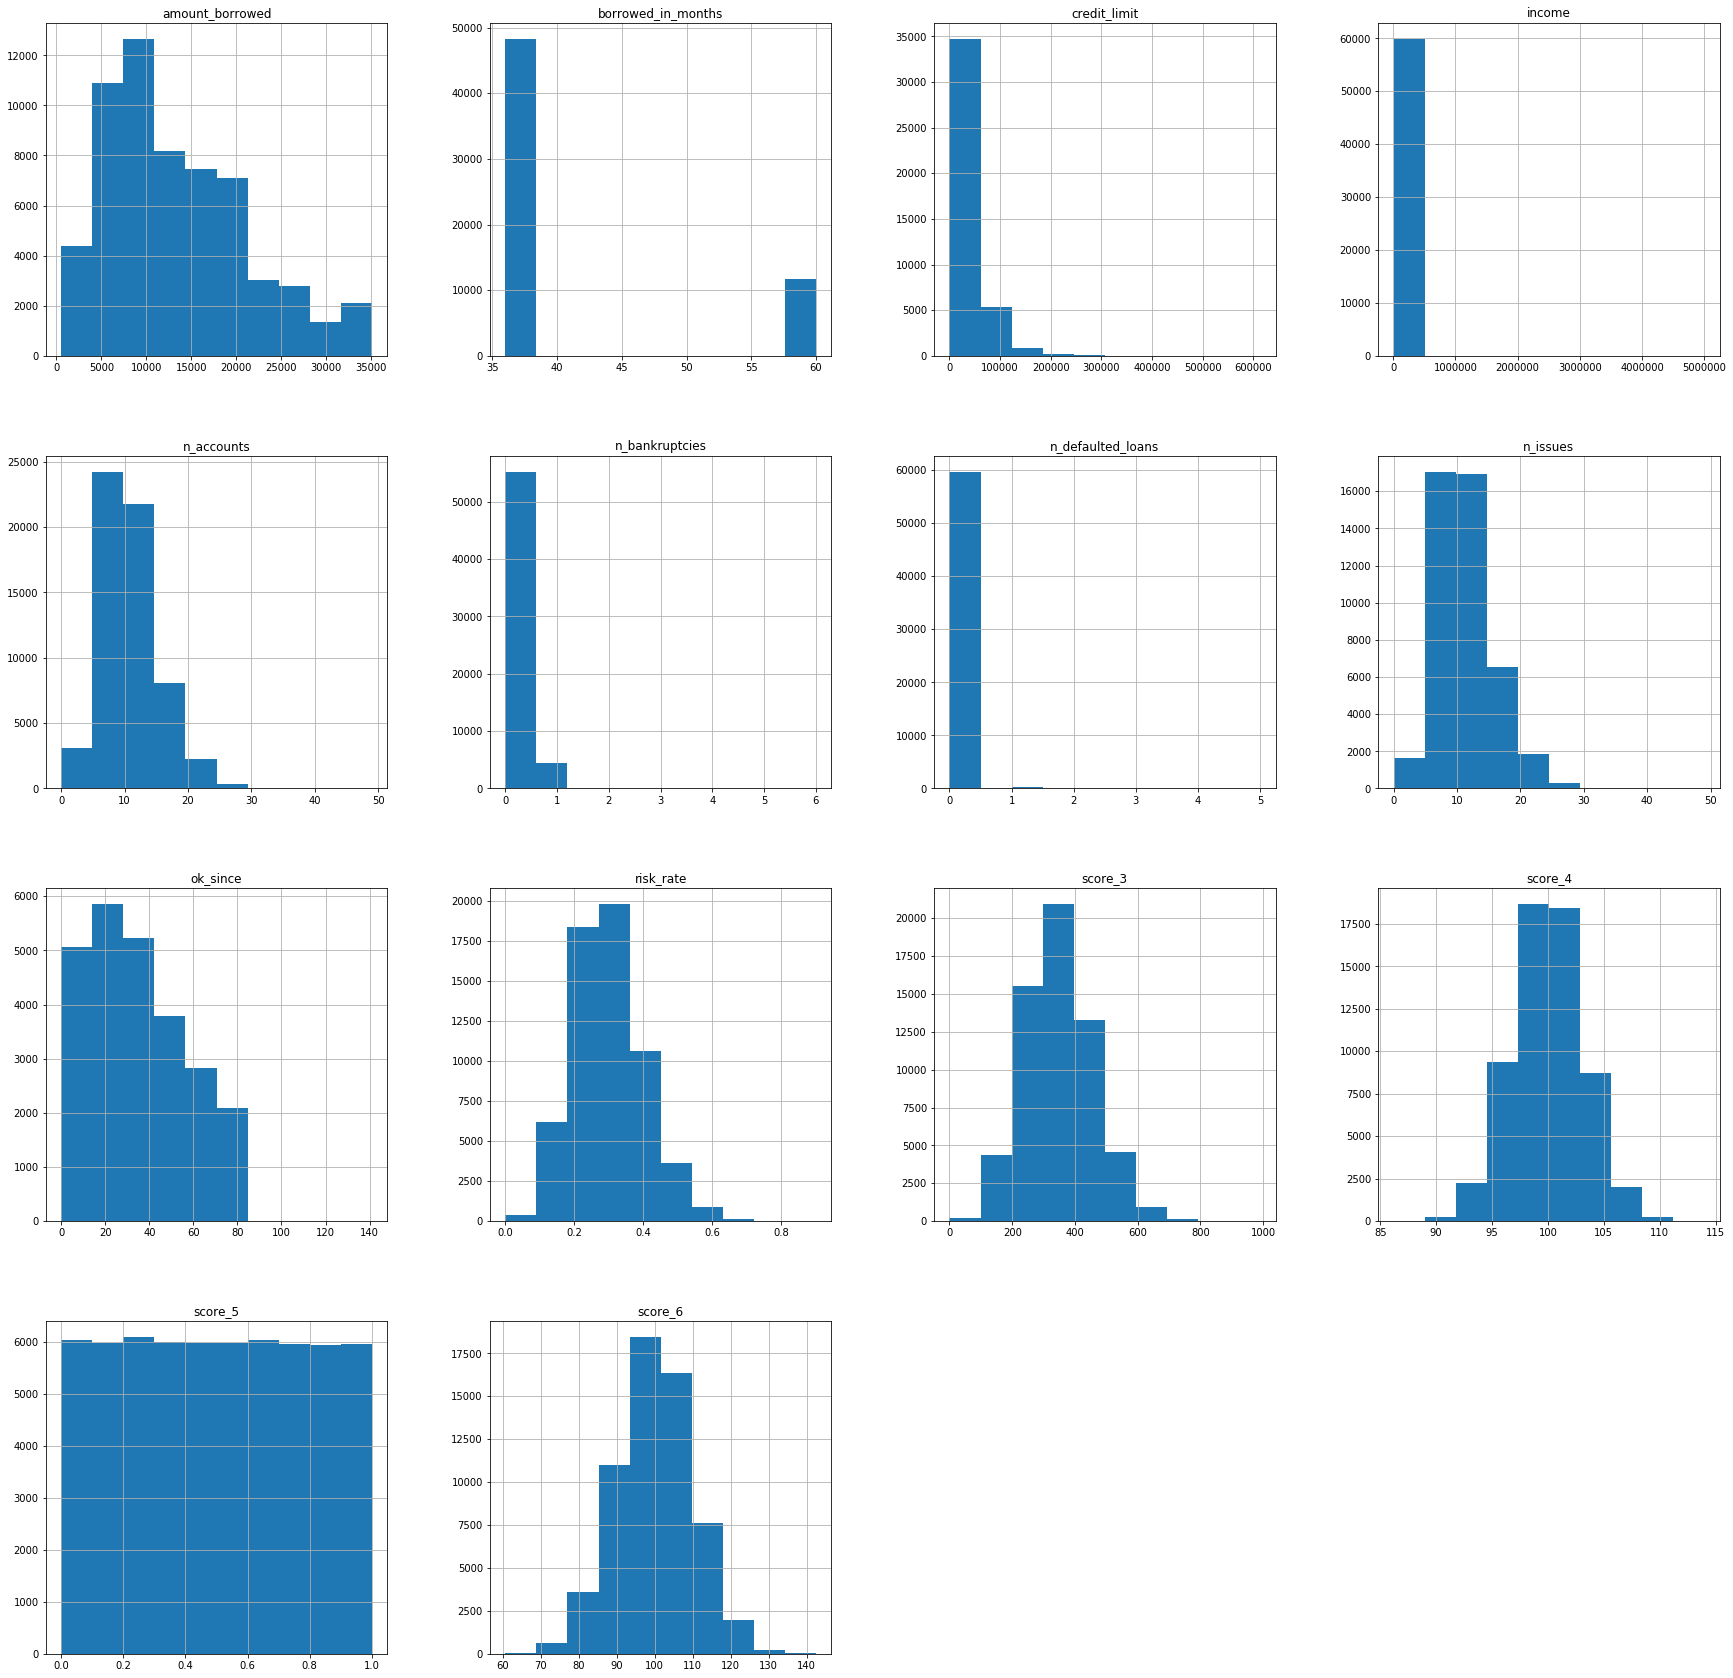

In [10]:
train_df[numerical_features].hist(figsize=(30,30))
# Income, credit_limit, n_bankruptcies, n_defaulted_loans are highly sckewed while, score_5 has close to zero variance

## Numerical and Date features handling

In [11]:
numerical_features

Index(['score_3', 'score_4', 'score_5', 'score_6', 'risk_rate',
       'amount_borrowed', 'borrowed_in_months', 'credit_limit', 'income',
       'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts',
       'n_issues'],
      dtype='object')

In [12]:
skew_values = skew(train_df[numerical_features], nan_policy = 'omit')
pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)

,Features,Skewness degree
0,score_3,0.333319
1,score_4,-0.015950
2,score_5,0.007547
3,score_6,-0.012761
4,risk_rate,0.485207
5,amount_borrowed,0.820511
6,borrowed_in_months,1.541417
7,credit_limit,2.782305
8,income,19.905292
9,ok_since,0.433557


In [13]:
# This is imputer function for binary_factor
def num_imputer(train_df, test_df, feature):
    imp_num = Imputer( missing_values=np.nan, strategy='median')
    train_df[feature] = imp_num.fit_transform(train_df[[feature]])
    test_df[feature] = imp_num.transform(test_df[[feature]])

In [14]:
num_feture = ['score_3', 'score_4', 'score_5', 'score_6', 'risk_rate',
       'amount_borrowed', 'borrowed_in_months', 'credit_limit', 'income',
       'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts',
       'n_issues']
for each in num_feture:
    num_imputer(train_df, test_df, each)

    - 'n_defaulted_loans' and 'income' are highly skewed
    -  missing_values are filled with median_value of the column

## Categorical and Date features handling

In [15]:
categorical_features

Index(['ids', 'default', 'score_1', 'score_2', 'reason', 'sign', 'gender',
       'facebook_profile', 'last_payment', 'end_last_loan', 'state', 'zip',
       'channel', 'job_name', 'real_state'],
      dtype='object')

### gender 

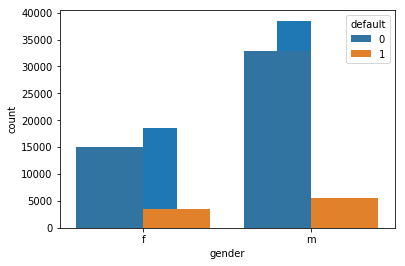

In [16]:
var = 'gender'
plt.hist(train_df[var])
sns.countplot(x = var, data = train_df, hue='default')

In [17]:
print(' Number of missing values gender:', len(train_df[(train_df.gender != 'f') &  (train_df.gender != 'm')]))
print(' defaulter- 1:', (train_df[(train_df.gender != 'f') &  (train_df.gender != 'm')]['default'] == 1).sum())
print(' none defaulter - 0:', (train_df[(train_df.gender != 'f') &  (train_df.gender != 'm')]['default'] == 0).sum())

 Number of missing values gender: 2996
 defaulter- 1: 498
 none defaulter - 0: 2498


In [18]:
# How many defaulters in male gender 
print('male defaulter count:', ((train_df[train_df.gender == 'm']['default'] == 1).sum()/len(train_df[train_df.gender == 'm'])*100))
#print('male none-defaulter count:', (train_df[train_df.gender == 'm']['default'] == 0).sum())
print('female defaulter count:', ((train_df[train_df.gender == 'f']['default'] == 1).sum()/len(train_df[train_df.gender == 'f'])*100))
#print('female none-defaulter count:', (train_df[train_df.gender == 'f']['default'] == 0).sum())

male defaulter count: 14.453074265527183
female defaulter count: 18.66507876360093


Quick notes:-
    - Approx. 500 of the defaulters belong to unknown gender class
    - female defaulter percentage is higher than male defaulter class
    - As a standard rule, decording all unknown gender to 'm' class

In [19]:
def gender_tran(df):
    x = df['gender'].map({'m':1, 'f':0})
    return x
train_df.gender = gender_tran(train_df)
test_df.gender  = gender_tran(test_df)

In [20]:
# This is imputer function for binary_factor
def imputer(train_df, test_df, feature):
    imp_freq = Imputer( missing_values=np.nan, strategy='most_frequent')
    train_df[feature] = imp_freq.fit_transform(train_df[[feature]])
    test_df[feature] = imp_freq.transform(test_df[[feature]])

In [21]:
# call Imputer
imputer(train_df, test_df, 'gender')

### facebook_profile

In [22]:
def fp_tran(df):
    x = df['facebook_profile'].map({True:1, False:0})
    return x
train_df.facebook_profile = fp_tran(train_df)
test_df.facebook_profile  = fp_tran(test_df)

In [23]:
print(' Number of missing values facebook_profile:', len(train_df[(train_df.facebook_profile != 1.0) &  (train_df.facebook_profile != 0)]))
print(' defaulter- 1:', (train_df[(train_df.facebook_profile != 1.0) &  (train_df.facebook_profile != 0)]['default'] == 1).sum())
print(' none defaulter - 0:', (train_df[(train_df.facebook_profile != 1.0) &  (train_df.facebook_profile != 0)]['default'] == 0).sum())

 Number of missing values facebook_profile: 5971
 defaulter- 1: 947
 none defaulter - 0: 5024


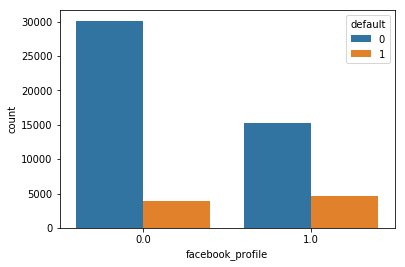

In [24]:
var = 'facebook_profile'
sns.countplot(x = var, data = train_df, hue='default')

In [25]:
# call Imputer
imputer(train_df, test_df, 'facebook_profile')

### sign

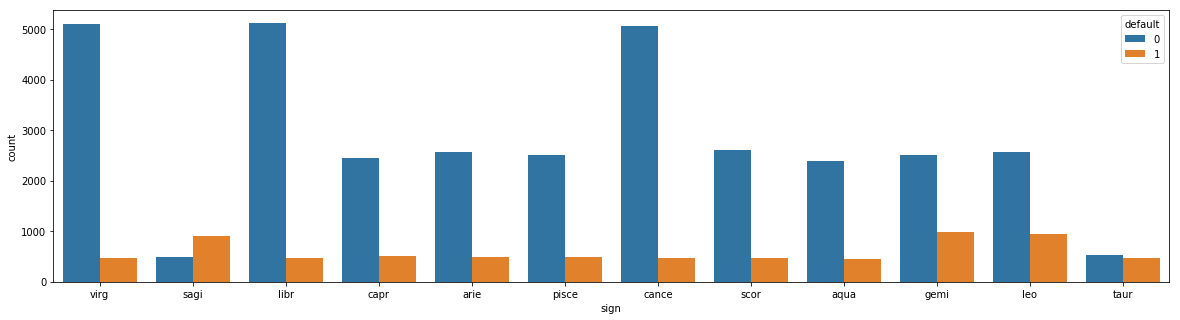

In [26]:
var = 'sign'
plt.figure(figsize=(20,5))
sns.countplot(x = var, data = train_df, hue='default', orient=90)

In [27]:
def sign_defaulter_per(df, feature, value):
    rec_len = len(df[df[feature] == value])
    if rec_len < 1:
        rec_len = 1
    print('{} --> '.format(value), end= '')
    print('defaulter count:', round(((df[df[feature] == value]['default'] == 1).sum()/rec_len*100),3))
    
sign_list = train_df.sign.unique()
for each in sign_list:
    sign_defaulter_per(train_df, 'sign', each)

virg --> defaulter count: 8.401
sagi --> defaulter count: 64.622
libr --> defaulter count: 8.277
nan --> defaulter count: 0.0
capr --> defaulter count: 17.14
arie --> defaulter count: 15.796
pisce --> defaulter count: 16.076
cance --> defaulter count: 8.572
scor --> defaulter count: 15.367
aqua --> defaulter count: 15.921
gemi --> defaulter count: 28.322
leo --> defaulter count: 27.06
taur --> defaulter count: 47.752


In [28]:
# Imputer done
var = 'sign'
value = train_df[var].value_counts().index[0]
train_df[var].fillna(value, inplace = True, axis = 0)
test_df[var].fillna(value, inplace = True, axis = 0)

quick notes:
        - virg, libr, cancer have large population
        - sagi, taur have relatively low population 
        - All levels are retained for, all of them all default categories > 5 %
        - Filling NaN with most frequent values in sign
        - Later, dummy encoding is required

### 'score_1', 'reason','score_2', 'state','zip','channel','job_name','real_state'

In [29]:
features_varLen = ['score_1', 'reason','score_2', 'state','zip','channel','job_name','real_state']
# filling 'NaN's' with most_frequent value in the column

for var in features_varLen:
    value = train_df[var].value_counts().index[0]
    train_df[var].fillna(value, inplace = True, axis = 0)
    test_df[var].fillna(value, inplace = True, axis = 0)

In [30]:
def extract_length(records):
    feature_len = [len(x) for x in records]
    return feature_len

In [32]:
train_df[features_varLen] = train_df[features_varLen].apply(lambda x: extract_length(x))

In [39]:
train_df[features_varLen].head(10)

,score_1,reason,score_2,state,zip,channel,job_name,real_state
0,24,128,24,24,24,24,108,24
1,24,128,24,24,24,24,108,24
2,24,128,24,24,24,24,108,24
3,24,128,24,24,24,24,108,24
4,24,128,24,24,24,24,108,24
5,24,128,24,24,24,24,108,24
6,24,128,24,24,24,24,108,24
7,24,128,24,24,24,24,108,24
8,24,128,24,24,24,24,108,24
9,24,128,24,24,24,24,108,24


Quick notes:-
    - Length of the encoded values are same for each features.
    - Drop these features, for they are not holding any significance now

### last_payment and end_last_loan

- creating new feature - date_diff_bt_loanEnd_lastPayment

In [35]:
var = 'end_last_loan'
value = train_df[var].value_counts().index[0]
train_df[var].fillna(value, inplace = True, axis = 0)
test_df[var].fillna(value, inplace = True, axis = 0)

In [36]:
var = 'last_payment'
value = train_df[var].value_counts().index[0]
train_df[var].fillna(value, inplace = True, axis = 0)
test_df[var].fillna(value, inplace = True, axis = 0)

In [37]:
def cal_date(df):
    final_date = []
    date_format = "%Y-%m-%d"
    
    for d1, d2 in zip(df.last_payment, df.end_last_loan):
        delta = datetime.strptime(d2, date_format) - datetime.strptime(d1, date_format)
        final_date.append(delta.days)
    return final_date

train_df['date_diff_bt_loanEnd_lastPayment'] = cal_date(train_df)
test_df['date_diff_bt_loanEnd_lastPayment'] = cal_date(test_df)

#### Hypotheis -
N0 - Has the defaulter paid loan much later after last_loan_payment_date

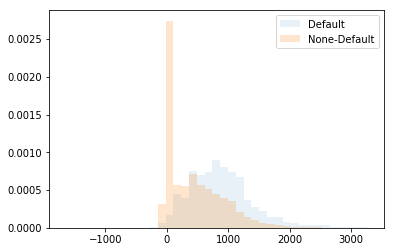

In [38]:
default = train_df[train_df.default == 1]['date_diff_bt_loanEnd_lastPayment']
non_default = train_df[train_df.default == 0]['date_diff_bt_loanEnd_lastPayment']
bins_ = np.linspace(-1673, 3287, 40)

plt.hist(default, bins = bins_, normed=True, alpha = 0.1, label = 'Default')
plt.hist(non_default, bins = bins_, normed=True, alpha = 0.2, label = 'None-Default')
plt.legend()

Quick notes:-
    - positive values indicates how many days after end_last_loan date, last_payment has been done.
    - None defaulters have mostly cleared loan amount on last_loan_day
    - Defaulters have done payment much later after end_last_loan date
    - 'date_diff_bt_loanEnd_lastPayment' seems to be an important features 
    - 'last_payment' and 'end_loan_last' will be dropped from dataset
    